___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
train = pd.read_csv('advertising.csv')

In [3]:
train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
train.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


**Check if there are any cities which are repeated many time**

In [6]:
train['City'].nunique()

969

In [7]:
train['City'].value_counts().head()

Lisamouth       3
Williamsport    3
West Steven     2
Millerbury      2
West Amanda     2
Name: City, dtype: int64

**Check for Ad topic line to see if there are many ad's that were clicked or not**

In [8]:
train['Ad Topic Line'].nunique()

1000

In [9]:
train['Ad Topic Line'].value_counts().head()

Assimilated homogeneous service-desk             1
Extended context-sensitive monitoring            1
Customizable systematic service-desk             1
Exclusive cohesive intranet                      1
Secured encompassing Graphical User Interface    1
Name: Ad Topic Line, dtype: int64

**As seen there are no cities and Ad's that are repeated many time to say that either a person from a particular city clicks ad or not or a person browinsing a specific ad topic clicks ad or not**

**Extract the day,monthsm year, hour, minute separately to see if at any month, day , time more ad's were clicked or not, i.e. to see if there is any relation between Clicked on Ad and timestamp**

In [10]:
year=pd.to_datetime(train['Timestamp']).dt.year.rename('year')
month=pd.to_datetime(train['Timestamp']).dt.month.rename('month')
day=pd.to_datetime(train['Timestamp']).dt.day.rename('day')
hour=pd.to_datetime(train['Timestamp']).dt.hour.rename('hour')

In [11]:
train = pd.concat([train,year,month,day,hour],axis=1)

In [12]:
train['year'].value_counts()

2016    1000
Name: year, dtype: int64

**As all the data is for year 2016, drop the year column**

In [13]:
train.drop(['year'],inplace=True,axis=1)

## Exploratory Data Analysis



**Check if there are any missing values, heatmap is a good way to visualise if there are any missing values**

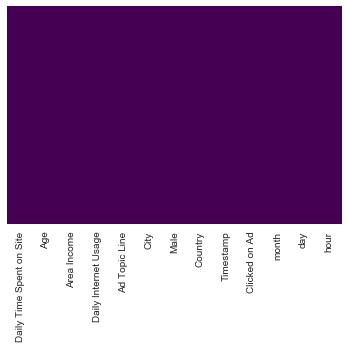

In [14]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**As seen from above heatmap, there are no missing values in the data**

**Check relation between month and if ad was clicked or not**

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


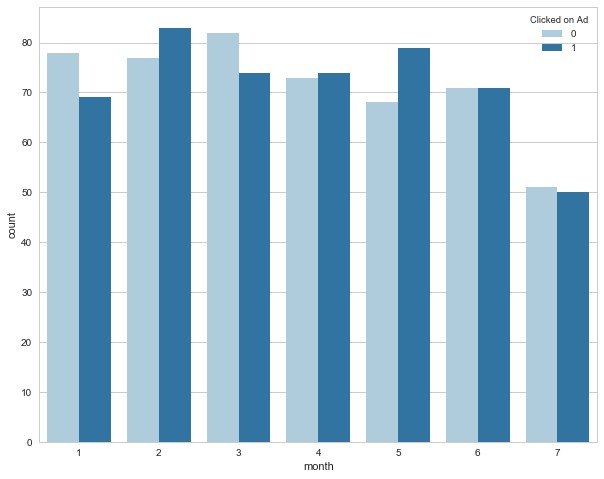

In [15]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Clicked on Ad',data=train,palette='Paired')

**Though there is some differenc in number of ad clicked in few months it doesn't look like a significant difference**

**Check relation between hour and if ad was clicked or not**

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


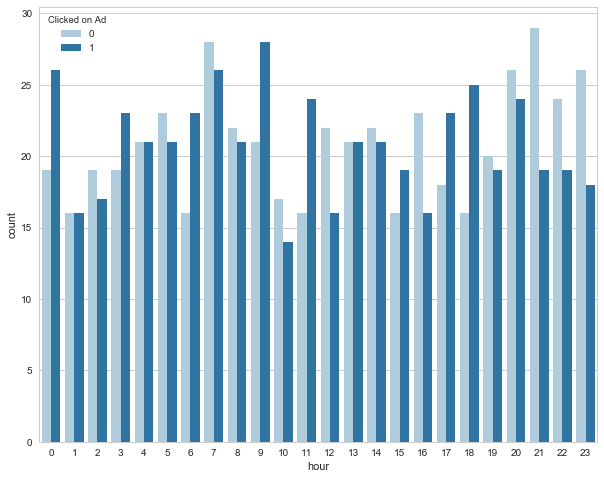

In [16]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.countplot(x='hour',hue='Clicked on Ad',data=train,palette='Paired')

**Looks like the hour has some effect on the output**

**Histogram showing Age.**

Text(0.5,0,'Age')

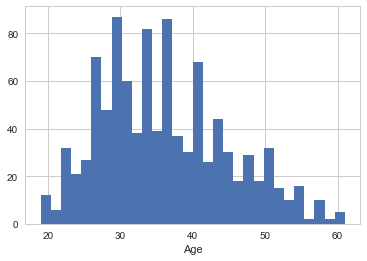

In [17]:
sns.set_style('whitegrid')
train['Age'].hist(bins=30)
plt.xlabel('Age')

**Counplot based on Gender to check if there is any relation as such**

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


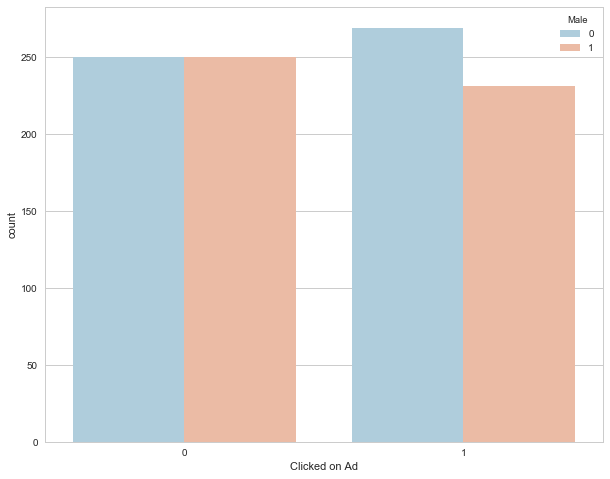

In [18]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.countplot(x='Clicked on Ad',hue='Male',data=train,palette='RdBu_r')

**Looks like more female have clicked on ad from above graph, but the difference seems to be less, for our initial analysis we can consider this column**

**jointplot showing Area Income versus Age.**

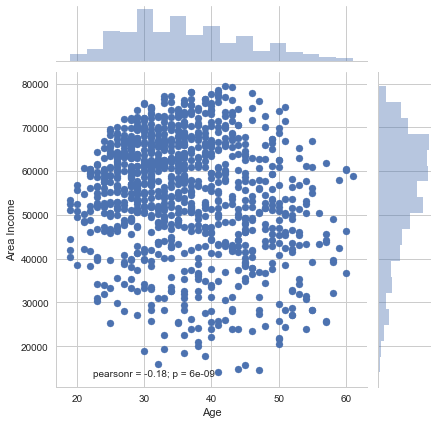

In [19]:
sns.jointplot(x="Age",y="Area Income",data=train)

**People betweem age 25 and 35 tend to have a higher income**

**jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

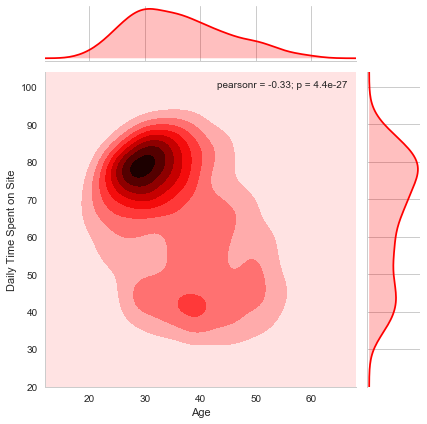

In [20]:
sns.jointplot(x="Age",y="Daily Time Spent on Site",data=train,kind='kde',color='red')

**And thee people between age 25 and 35 , tend to spend more time on Site, Suggesting a possible relation between Age, income and time spent**

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

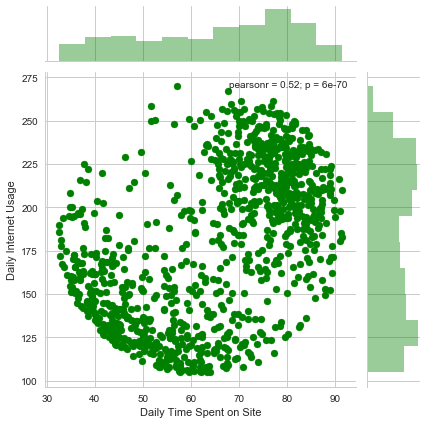

In [21]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=train,color='green')

**The above two variable are positively correlated**

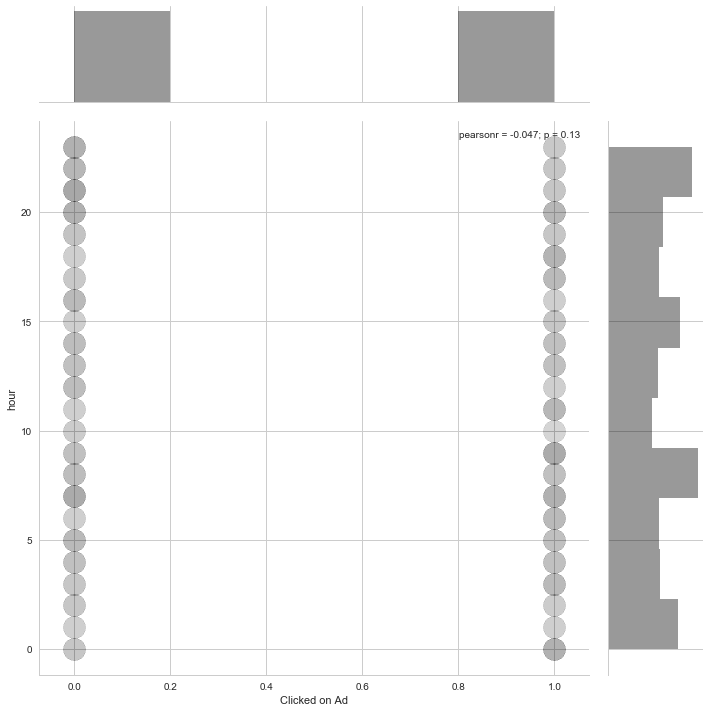

In [22]:
sns.jointplot(x="Clicked on Ad",y="hour",data=train,alpha=0.01,color='black',size=10,joint_kws={"s":500})

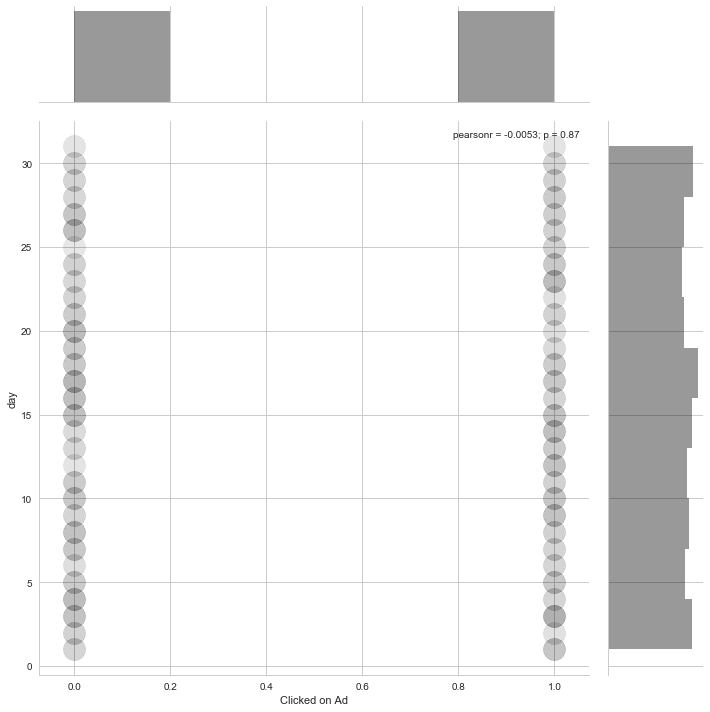

In [23]:
sns.jointplot(x="Clicked on Ad",y="day",data=train,alpha=0.01,color='black',size=10,joint_kws={"s":500})

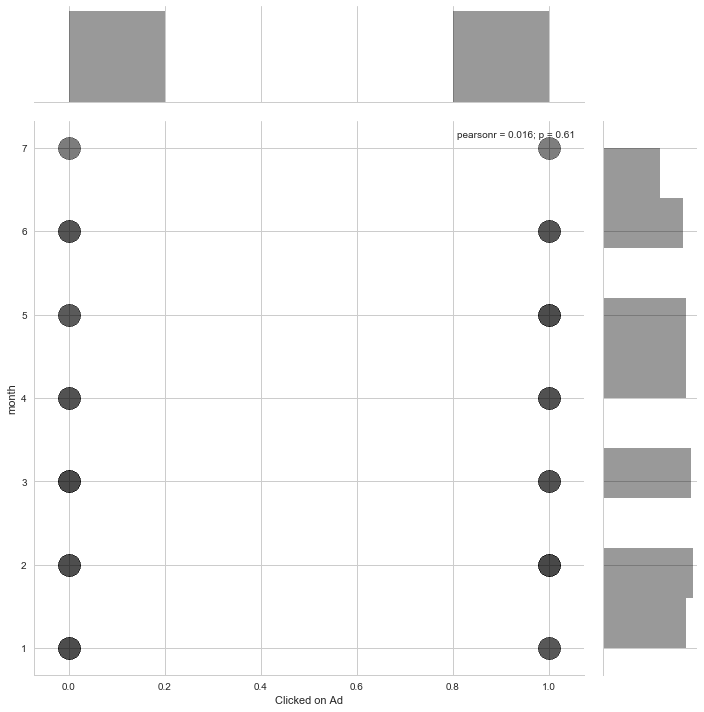

In [24]:
sns.jointplot(x="Clicked on Ad",y="month",data=train,alpha=0.01,color='black',size=10,joint_kws={"s":500})

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

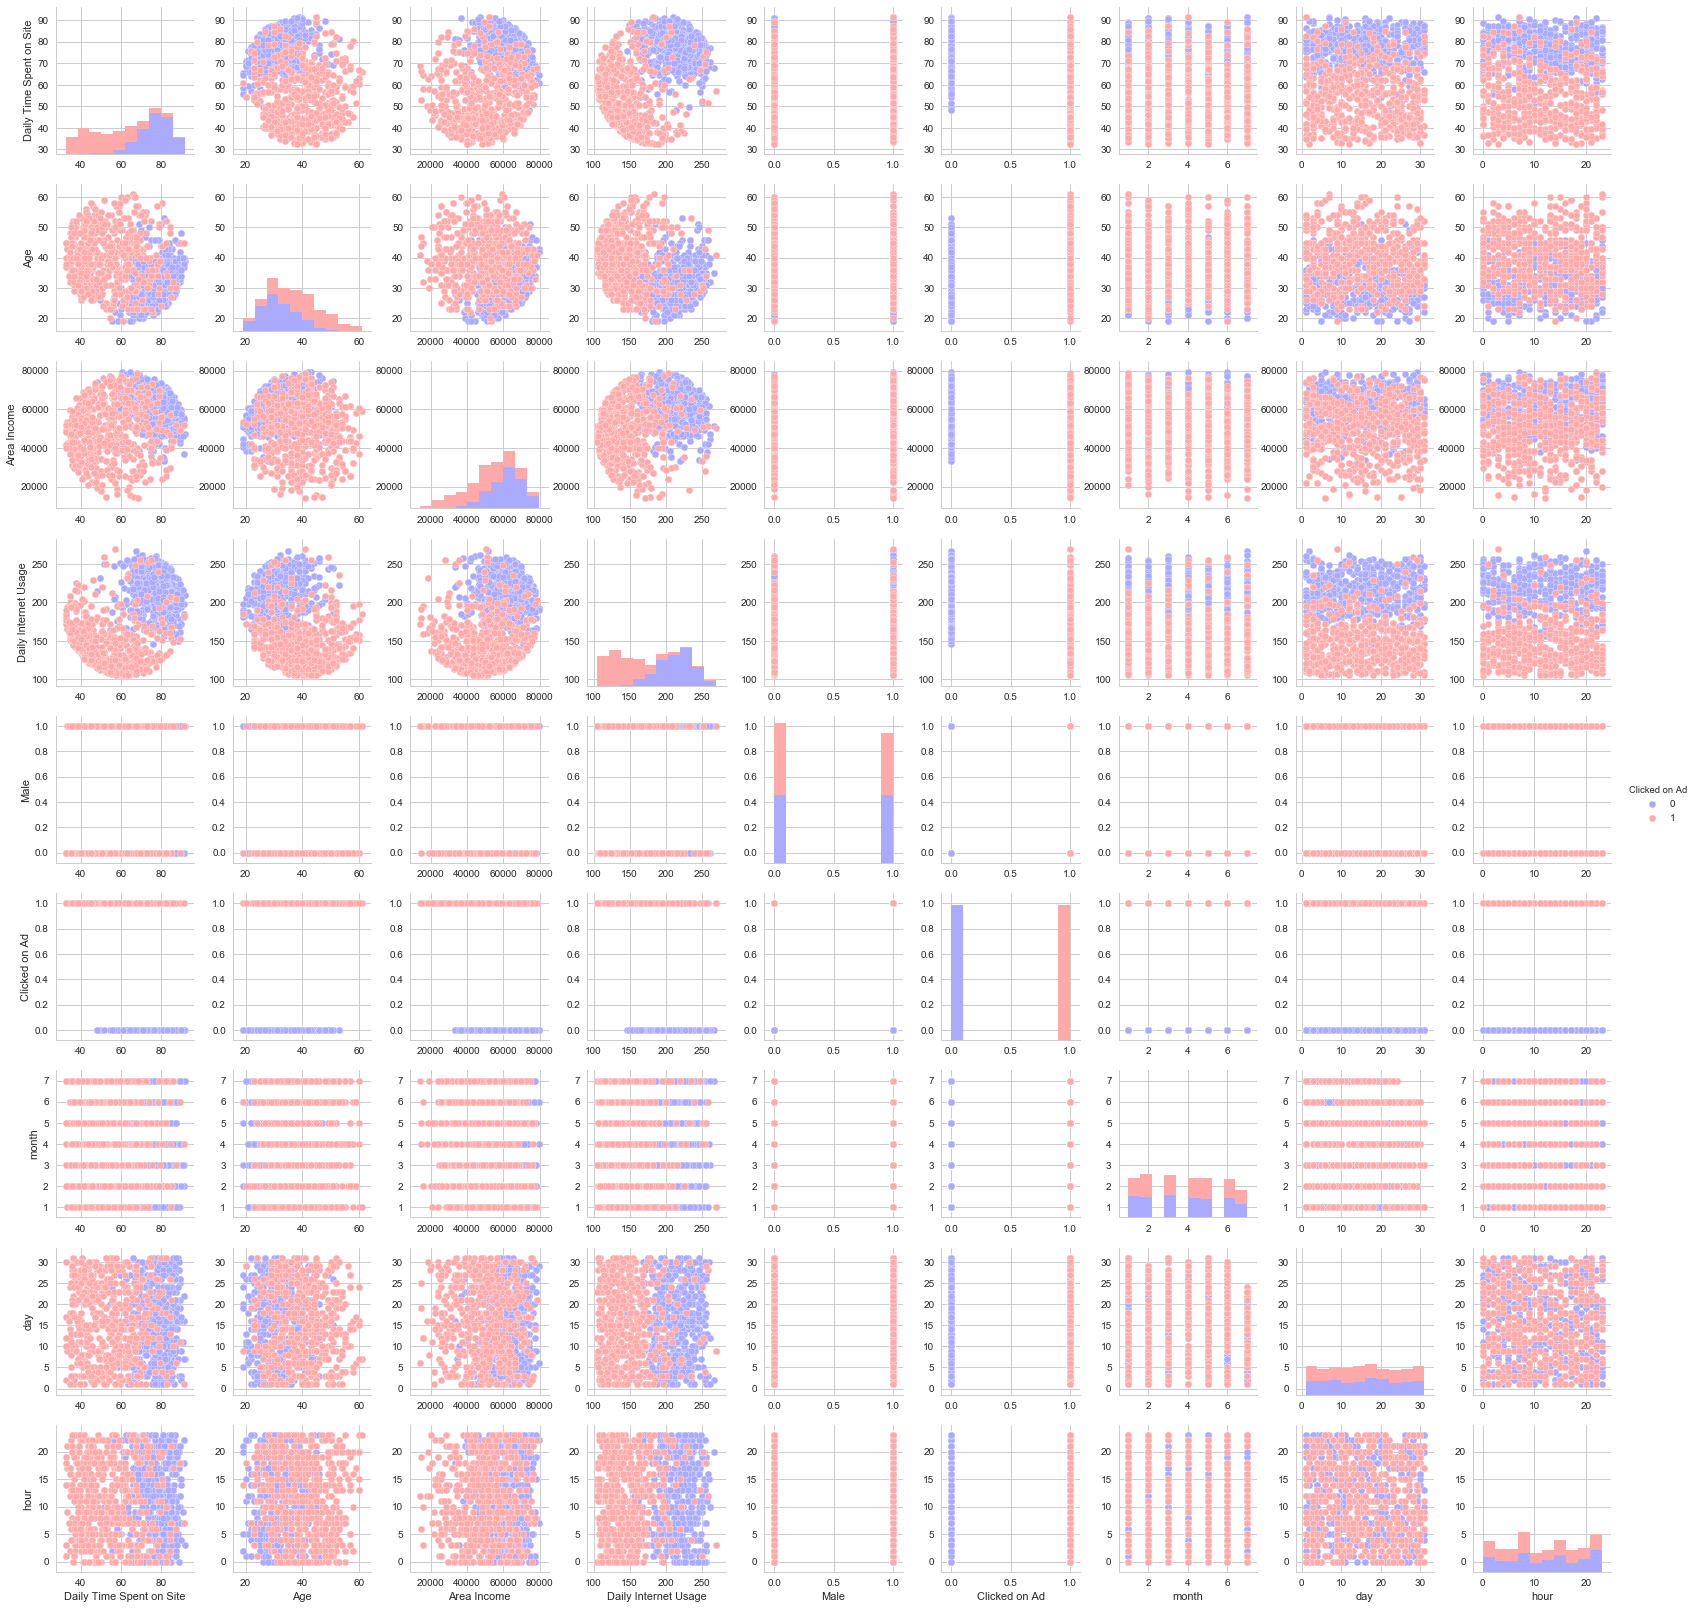

In [25]:
sns.pairplot(data=train,hue='Clicked on Ad',palette='bwr')

**Time Stamp column can be removed, as seen the hour from time stamp might have an affect on output based on the jointplot. So from time stamp we will just keep the hour.
The ad topic and city are all mostly distint values, so there is no particular trend which might say people from specific city click on add, or persons browsing specific add will click on it, hence we will remove these two columns
Based on gender female's count for clicked and not clicked is same, but for men number of ad's clicked is less then number of ad's not clicked. So we can retain this columns.
As seen from the joint plot between Daily time spent on sit and Daily Internet Usage there is some relation, but the correlation is not to an extent which might cause multicollinearity , hence for now we can retain both the columns.
Even though few countries have more ad's clicked for now we can ignore that column.
**

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [26]:
train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,month,day,hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,3,27,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,4,4,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,3,13,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,1,10,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,6,3,3


In [27]:
train.drop(['Ad Topic Line','City','Timestamp','month','day','Country'],inplace=True,axis=1)

In [28]:
train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,hour
0,68.95,35,61833.90,256.09,0,0,0
1,80.23,31,68441.85,193.77,1,0,1
2,69.47,26,59785.94,236.50,0,0,20
3,74.15,29,54806.18,245.89,1,0,2
4,68.37,35,73889.99,225.58,0,0,3


In [29]:
from sklearn.model_selection import train_test_split
X=train[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male','hour']]
y=train['Clicked on Ad']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

** Train and fit a logistic regression model on the training set.**

In [31]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [32]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [33]:
predicted_values = logmodel.predict(X_test)

** Create a classification report for the model.**

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test,predicted_values))

             precision    recall  f1-score   support

          0       0.85      0.95      0.90       146
          1       0.95      0.84      0.89       154

avg / total       0.90      0.90      0.90       300



**ROC Curve**

In [36]:
from sklearn.metrics import roc_curve

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


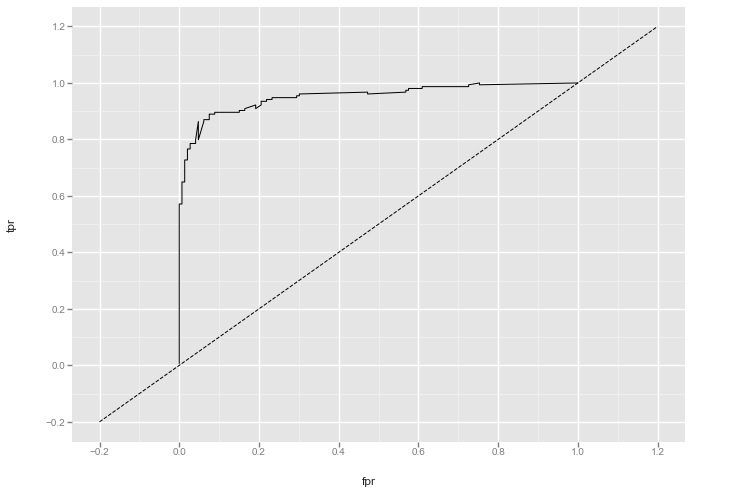

<ggplot: (303773809)>

In [37]:
from ggplot import *
predict_prob=logmodel.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, predict_prob)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

##Reference for ploting : http://blog.yhat.com/posts/roc-curves.html

**Area Under Curve**

In [38]:
from sklearn.metrics import roc_auc_score

In [39]:
roc_auc_score(y_test,predict_prob)

0.95289983988614124

**pvalue and coefficients**

In [40]:
model = LogisticRegression(fit_intercept = False, C = 1e9)
mdl = model.fit(X_train, y_train)
model.coef_


array([[ -5.54098494e-02,   2.62408986e-01,  -2.05096723e-05,
         -3.04998500e-02,   3.97076088e-03,   7.70686962e-02]])

In [41]:

import statsmodels.discrete.discrete_model as sm
logit = sm.Logit(y_train, X_train).fit()


Optimization terminated successfully.
         Current function value: 0.235490
         Iterations 8


In [42]:
logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit               No. Iterations:      8.0000  
Dependent Variable:    Clicked on Ad       Pseudo R-squared:    0.660   
Date:                  2017-11-11 14:26    AIC:                 341.6866
No. Observations:      700                 BIC:                 368.9930
Df Model:              5                   Log-Likelihood:      -164.84 
Df Residuals:          694                 LL-Null:             -485.16 
Converged:             1.0000              Scale:               1.0000  
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Daily Time Spent on Site -0.0561   0.0100 -5.6101 0.0000 -0.0757 -0.0365
Age                       0.2661   0.0211 12.6291 0.0000  0.2248  0.3074
Area Income              -0.0000   0.0000 -2.0637 0.0390 -0.0000 -0.0000
Daily Internet Usage     -0.0317   0.0041 -7.7116 0.0000 -0.0397 -0.0236
Male                      0.2265   0.2916  0.7769 0.4372 -0.3450  0.7980
hour                      0.0812   0.0212  3.8359 0.0001  0.0397  0.1227
========================================================================

"""

**The precision, recall and fscore suggest the model is a good fit
Similarly the ROC curve and AUC suggest that model AUC is close to 1, which means the model is a good fit.
**

**The pvalue for Male suggests that it is in favour of null hypothesis and hence we can try to ignore the Male column and check the Analysis**

In [43]:
train.drop(['Male'],inplace=True,axis=1)

In [44]:
train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad,hour
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,0,1
2,69.47,26,59785.94,236.50,0,20
3,74.15,29,54806.18,245.89,0,2
4,68.37,35,73889.99,225.58,0,3


**Apply Logistic Regression Model removing the Male**

In [45]:
from sklearn.model_selection import train_test_split
X=train[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','hour']]
y=train['Clicked on Ad']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
predicted_values = logmodel.predict(X_test)

In [48]:
print(classification_report(y_test,predicted_values))

             precision    recall  f1-score   support

          0       0.85      0.95      0.90       146
          1       0.95      0.84      0.89       154

avg / total       0.90      0.90      0.90       300



**ROC Curve and AUC**

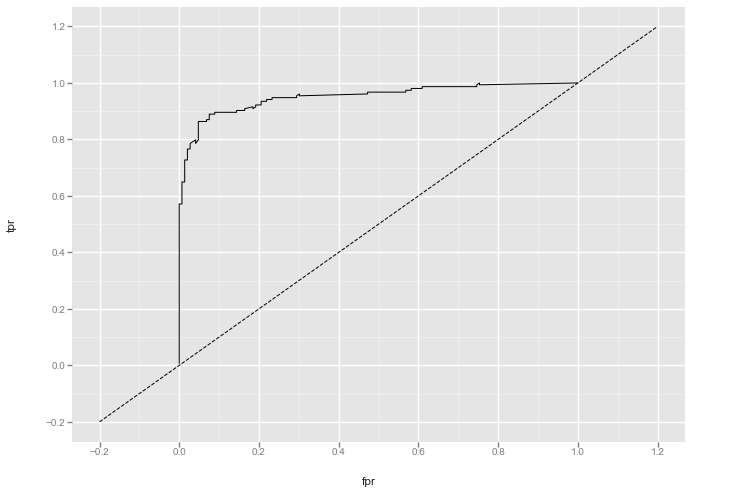

<ggplot: (305291426)>

In [49]:
from ggplot import *
predict_prob=logmodel.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, predict_prob)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

##Reference for ploting : http://blog.yhat.com/posts/roc-curves.html

In [50]:
roc_auc_score(y_test,predict_prob)

0.95276641167052134

**Pvalue and coefficients**

In [51]:
logit = sm.Logit(y_train, X_train).fit()
logit.summary2()

Optimization terminated successfully.
         Current function value: 0.235923
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit               No. Iterations:      8.0000  
Dependent Variable:    Clicked on Ad       Pseudo R-squared:    0.660   
Date:                  2017-11-11 14:26    AIC:                 340.2925
No. Observations:      700                 BIC:                 363.0479
Df Model:              4                   Log-Likelihood:      -165.15 
Df Residuals:          695                 LL-Null:             -485.16 
Converged:             1.0000              Scale:               1.0000  
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Daily Time Spent on Site -0.0565   0.0100 -5.6483 0.0000 -0.0761 -0.0369
Age                       0.2670   0.0211 12.6797 0.0000  0.2257  0.3083
Area Income              -0.0000   0.0000 -2.0895 0.0367 -0.0000 -0.0000
Daily Internet Usage     -0.0311   0.0040 -7.7195 0.0000 -0.0391 -0.0232
hour                      0.0821   0.0211  3.8819 0.0001  0.0406  0.1235
========================================================================

"""

**This model values suggests that all the variables have a pvalue which will reject the null hypothesis, thereby suggesting all variables used are significant for the model**